# __MicroMLGen__

Reference: <br>
- https://eloquentarduino.github.io/2019/11/you-can-run-machine-learning-on-arduino/ <br>
- https://github.com/eloquentarduino/micromlgen
- https://sklearn-rvm.readthedocs.io/en/latest/auto_examples/plot_rvm_for_classification.html
- https://sklearn-rvm.readthedocs.io/en/latest/generated/sklearn_rvm.em_rvm.EMRVC.html#sklearn_rvm.em_rvm.EMRVC

In [1]:
from micromlgen import port

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [3]:
from scipy import signal
from scipy.fft import fftshift
from scipy.io.wavfile import read

In [4]:
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay

In [5]:
from sklearn_rvm import EMRVC

In [6]:
import librosa
from librosa.feature import melspectrogram, mfcc

In [7]:
from typing import List, Tuple

In [8]:
from audio_utils import *

In [9]:
Categories=['cough', 'sumimasenn', 'tasukete']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='data/input_from_sspf/' 

In [10]:
sample_rate =  16000

In [11]:
spectrogram_array = []
target_array = []
for i in Categories:
    print(f'loading... category : {i}')
    path = os.path.join(datadir, i)
    for sound in os.listdir(os.path.join(datadir,i)):
        if sound.endswith('.wav'):
            x, _ = librosa.load(os.path.join(path, sound), sr=sample_rate)
            if x.shape[0] < sample_rate:
                continue
            if x.shape[0] > sample_rate:
                x = x[0:sample_rate]
            spectrogram_array.append(get_spectrogram2(x).flatten())
            # spectrogram_array.append(get_spectrogram(os.path.join(path, sound)))
            target_array.append(Categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : cough
loaded category:cough successfully
loading... category : sumimasenn
loaded category:sumimasenn successfully
loading... category : tasukete
loaded category:tasukete successfully


In [ ]:
df=pd.DataFrame(spectrogram_array) #dataframe
df['Target']=target

In [ ]:
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

## Classification part

In [14]:
list_param_gamma = ['auto', 'scale']
list_param_kernel = ['linear', 'rbf', 'poly', 'sigmoid', 'precomputed']
list_param_degree = [2, 3, 4, 5]

In [16]:
param_grid_rvc = {'gamma': list_param_gamma, 'kernel': list_param_kernel, 'degree': list_param_degree}

In [18]:
rvc = SVC(probability=True)
model_rvc = GridSearchCV(svc, param_grid_svc)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [22]:
model_svc.fit(x_train,y_train)
print('The Model (SVC) is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

The Model (SVC) is trained well with the given images


In [23]:
y_pred = model_svc.predict(x_test)

In [24]:
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 87.5% accurate


In [25]:
np.set_printoptions(precision=2)

In [26]:
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

Confusion matrix, without normalization
[[26  0]
 [ 0 30]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


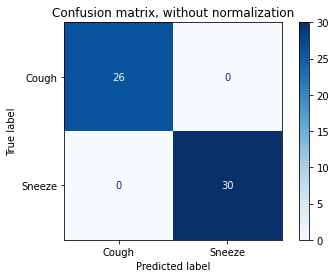

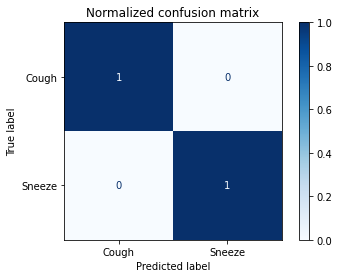

In [27]:
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model_svc,
        x_test,
        y_pred,
        display_labels=Categories,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [28]:
# print best parameter after tuning
print(model_svc.best_params_)

{'C': 0.01, 'gamma': 1e-05, 'kernel': 'linear'}


In [29]:
# print how our model looks after hyper-parameter tuning
print(model_svc.best_estimator_)

SVC(C=0.01, gamma=1e-05, kernel='linear', probability=True)


In [31]:
model_nu_svc.fit(x_train, y_train)
print('The Model (NuSVC) is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).

The Model (NuSVC) is trained well with the given images


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [32]:
y_pred_nu = model_nu_svc.predict(x_test)
print(f"The model is {accuracy_score(y_pred_nu,y_test)*100}% accurate")

The model is 82.14285714285714% accurate


In [33]:
model_tree.fit(x_train, y_train)
print('The Model (Tree) is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.